In [80]:
!pip install  xgboost
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, confusion_matrix, classification_report
import sklearn.metrics as metrics
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.grid_search import GridSearchCV, RandomizedSearchCV
import pickle
from xgboost import XGBClassifier

You are using pip version 18.1, however version 19.0.2 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [2]:
#Data Processing:
#a) Import the data from the website directly
adult_df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', header = None, skipinitialspace=True)

In [3]:
list_of_columns = ["age", "workclass", "fnlwgt", "education", "education_num", "marital_status", "occupation", "relationship", "race", "sex", "capital_gain", "capital_loss", "hours_per_week", "native_country","salary"]
adult_df.columns = list_of_columns
adult_df.shape

(32561, 15)

In [4]:
adult_df = adult_df.drop(['fnlwgt'],axis=1)

In [5]:
adult_df.salary = adult_df.salary.replace(">50K",1)
adult_df.salary = adult_df.salary.replace("<=50K",0)
adult_df.head()

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [6]:
X = adult_df.iloc[:,:-1]
print(X.shape)
y = adult_df.iloc[:,-1]
print(y.shape)

(32561, 13)
(32561,)


In [7]:
X_encoded = pd.get_dummies(X)

In [8]:
#d) Split data into train / test set using an 70/30 split. Recall that you should be generating an X_train, X_test, y_train, and y_test.
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=.3, random_state=42)

In [63]:
#2) Random Forest Classifier - Base Model:
#a Use the RandomForestClassifier in sklearn. 
clf = RandomForestClassifier(random_state=3)
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=3, verbose=0, warm_start=False)

In [64]:
#2) Random Forest Classifier - Base Model:
#b Use the fitted model to predict on test data. Use the .predict_proba() and the .predict() methods to get predicted probabilities as well as predicted classes.
y_pred = clf.predict(X_test)
print(np.unique(y_pred))
print(np.unique(clf.predict_proba(X_test)))

[0 1]
[0.         0.01       0.01428571 0.01666667 0.01818182 0.02
 0.02142857 0.025      0.02857143 0.03333333 0.03611111 0.04
 0.04583333 0.04928571 0.05       0.05444444 0.05714286 0.06
 0.0625     0.065      0.06666667 0.06857143 0.06966153 0.07
 0.07142857 0.07440476 0.075      0.08       0.08333333 0.08333333
 0.08948524 0.09166667 0.095      0.09833333 0.1        0.10496032
 0.10690476 0.10833333 0.11178571 0.1125     0.11274725 0.11328671
 0.11428571 0.11619048 0.11666667 0.1175     0.12       0.1202381
 0.12166667 0.125      0.12504329 0.12857143 0.13068182 0.13095238
 0.13166667 0.1325     0.13320818 0.13333333 0.13729659 0.14
 0.14489177 0.14545455 0.15       0.15467033 0.15833333 0.16
 0.16111111 0.1625     0.16666667 0.16722222 0.17142857 0.175
 0.18       0.18166667 0.18270202 0.18333333 0.18333333 0.18452381
 0.18666667 0.1875     0.18761905 0.18791486 0.18857143 0.19069114
 0.19111111 0.19166667 0.195      0.19583333 0.19893218 0.19904762
 0.19941392 0.2        0.203333

In [65]:
#c) Calculate the confusion matrix and classification report (both are in sklearn.metrics). These are the same tools from HW #3.
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))


[[6844  611]
 [ 925 1389]]
             precision    recall  f1-score   support

          0       0.88      0.92      0.90      7455
          1       0.69      0.60      0.64      2314

avg / total       0.84      0.84      0.84      9769



In [66]:
#d) Calculate the roc_auc_score for this model. There are many ways to do this, but an example is to use the probabilities from step B and utilize the roc_auc_score from sklearn.
y_pred = clf.predict(X_test)
print(roc_auc_score(y_test,y_pred))

0.7591504370504212


In [67]:
#e) Identify the top 5 features:
pd.DataFrame(clf.feature_importances_,index = X_train.columns,
        columns=['importance']).sort_values('importance',ascending=False).iloc[:5,:]

,importance
age,0.231459
hours_per_week,0.110898
capital_gain,0.109006
education_num,0.070090
marital_status_Married-civ-spouse,0.065040


In [68]:
#f) 
y_pred_train = clf.predict(X_train)
print(classification_report(y_train,y_pred_train))

             precision    recall  f1-score   support

          0       0.97      0.99      0.98     17265
          1       0.96      0.91      0.93      5527

avg / total       0.97      0.97      0.97     22792



Is there overfitting?
Yes there is overfitting because we gett an avg accuracy of 97% for our training data while we get an average accuracy of 84% on our test data. 

In [57]:
#Part 3 
#a)
clf = RandomForestClassifier()
ABC = AdaBoostClassifier()
param_grid = {'n_estimators':[100, 200,300,400],
'learning_rate':[0.2,0.4,0.6,0.8,1, 1.2],
'random_state':[0]}

RF_Grid = GridSearchCV(ABC, param_grid=param_grid, scoring='roc_auc', cv=5)
RF_Grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [100, 200, 300, 400], 'learning_rate': [0.2, 0.4, 0.6, 0.8, 1, 1.2], 'random_state': [0]},
       pre_dispatch='2*n_jobs', refit=True, scoring='roc_auc', verbose=0)

In [59]:
#b Use the fitted model to predict on test data. Use the .predict_proba() and the .predict() methods to get predicted probabilities as well as predicted classes.
y_pred = RF_Grid.predict(X_test)
print(np.unique(y_pred))
print(np.unique(RF_Grid.predict_proba(X_test)))

[0 1]
[0.4664587  0.46717852 0.46983509 ... 0.53016491 0.53282148 0.5335413 ]


In [60]:
#c) Calculate the confusion matrix and classification report (both are in sklearn.metrics). These are the same tools from HW #3.
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))


[[7008  447]
 [ 807 1507]]
             precision    recall  f1-score   support

          0       0.90      0.94      0.92      7455
          1       0.77      0.65      0.71      2314

avg / total       0.87      0.87      0.87      9769



In [61]:
#d) Calculate the roc_auc_score for this model. There are many ways to do this, but an example is to use the probabilities from step B and utilize the roc_auc_score from sklearn.
print(roc_auc_score(y_test,y_pred))

0.7956467412947869


In [41]:
#e) Identify the top 5 features:
pd.DataFrame(RF_Grid.best_estimator_.feature_importances_,index = X_train.columns,
        columns=['importance']).sort_values('importance',ascending=False).iloc[:5,:]

,importance
marital_status_Separated,0.376066
capital_loss,0.070819
age,0.059577
capital_gain,0.054312
hours_per_week,0.050521


In [69]:
#f) 
y_pred_train = clf.predict(X_train)
print(classification_report(y_train,y_pred_train))

             precision    recall  f1-score   support

          0       0.97      0.99      0.98     17265
          1       0.96      0.91      0.93      5527

avg / total       0.97      0.97      0.97     22792



The model is slightly overfitted as we are returnced an average accuracy of 97% for our 
training data while our test data returned an accuracy  of 87%. 

In [18]:
#Part 4
#a) Use GradientBoostingClassifier along with GridSearchCV
param_grid = {'max_depth':[1,2],
'learning_rate':[.5,1],
'random_state':[0],
'n_estimators':[100,200,300,400]}
GBC = GridSearchCV(GradientBoostingClassifier(), param_grid, cv=10, n_jobs=-1, scoring='roc_auc')
GBC.fit(X_train,y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'max_depth': [1, 2], 'learning_rate': [0.5, 1], 'random_state': [0], 'n_estimators': [100, 200, 300, 400]},
       pre_dispatch='2*n_jobs', refit=True, scoring='roc_auc', verbose=0)

In [19]:
#b) Calculate predictions for the training data & build the classification report & roc_auc_score. Are there signs of overfitting? Why or why not?
y_pred = GBC.predict(X_test)
print(GBC.predict(X_test))
print(GBC.predict_proba(X_test))


[0 1 1 ... 0 1 1]
[[0.99197158 0.00802842]
 [0.39465778 0.60534222]
 [0.28501753 0.71498247]
 ...
 [0.99566338 0.00433662]
 [0.46147546 0.53852454]
 [0.00232775 0.99767225]]


In [22]:
#c)
print(classification_report(y_pred,y_test))
print(confusion_matrix(y_pred,y_test))

             precision    recall  f1-score   support

          0       0.94      0.90      0.92      7800
          1       0.65      0.77      0.71      1969

avg / total       0.88      0.87      0.88      9769

[[7000  800]
 [ 455 1514]]


In [23]:
#d)
print(roc_auc_score(y_test,y_pred))

0.796622721056967


In [41]:
#e) Identify the top 5 features:
pd.DataFrame(GBC.best_estimator_.feature_importances_,index = X_train.columns,
        columns=['importance']).sort_values('importance',ascending=False).iloc[:5,:]

,importance
marital_status_Separated,0.376066
capital_loss,0.070819
age,0.059577
capital_gain,0.054312
hours_per_week,0.050521


In [26]:
#f)
y_pred_train = GBC.predict(X_train)
print(classification_report(y_train,y_pred_train))

             precision    recall  f1-score   support

          0       0.90      0.95      0.93     17265
          1       0.81      0.69      0.75      5527

avg / total       0.88      0.89      0.88     22792



This model is not overfitted as it retains an accuracy of around 88% from our training model to our test model. 

In [28]:
#Part 5
#a) a use the following parameters:
param_grid = {'max_depth':[1,2],
'learning_rate':np.arange(.1,1.7,.1),
'random_state':[0],
'n_estimators':[100,200,300,400]}
xg = RandomizedSearchCV(GradientBoostingClassifier(), param_grid, cv=10, n_jobs=-1, scoring='roc_auc')
xg.fit(X_train,y_train)

RandomizedSearchCV(cv=10, error_score='raise',
          estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False),
          fit_params={}, iid=True, n_iter=10, n_jobs=-1,
          param_distributions={'max_depth': [1, 2], 'learning_rate': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6]), 'random_state': [0], 'n_estimators': [100, 200, 300, 400]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          scoring='roc_auc', verbose=0)

In [29]:
#b) Calculate predictions for the training data & build the classification report & roc_auc_score. Are there signs of overfitting? Why or why not?
y_pred = xg.predict(X_test)
print(xg.predict(X_test))
print(xg.predict_proba(X_test))

[0 1 1 ... 0 1 1]
[[0.99172061 0.00827939]
 [0.40968564 0.59031436]
 [0.35345037 0.64654963]
 ...
 [0.99494009 0.00505991]
 [0.4455486  0.5544514 ]
 [0.00342006 0.99657994]]


In [30]:
#c)
print(classification_report(y_pred,y_test))
print(confusion_matrix(y_pred,y_test))

             precision    recall  f1-score   support

          0       0.94      0.90      0.92      7831
          1       0.65      0.78      0.71      1938

avg / total       0.88      0.87      0.88      9769

[[7019  812]
 [ 436 1502]]


In [31]:
#d)
print(roc_auc_score(y_test,y_pred))

0.7953041208936129


In [42]:
#e) Identify the top 5 features:
pd.DataFrame(xg.best_estimator_.feature_importances_,index = X_train.columns,
        columns=['importance']).sort_values('importance',ascending=False).iloc[:5,:]

,importance
capital_gain,0.122555
capital_loss,0.120927
age,0.077467
hours_per_week,0.076557
education_num,0.065115


In [44]:
#f)
y_pred_train = xg.predict(X_train)
print(classification_report(y_train,y_pred_train))

             precision    recall  f1-score   support

          0       0.90      0.95      0.92     17265
          1       0.80      0.67      0.73      5527

avg / total       0.88      0.88      0.88     22792



This model is not overfitted as it retains an accuracy of around 88% from our training model to our test model. 

a) What does the alpha parameter represent in AdaBoost? Please refer to chapter 7 of the Hands-On ML book if you are struggling.
Alpha is the weight that is applied to a classifier. The first time the model is trained, alpha will be weighted equally for all classifiers. The alpha will decrease for a given paramter as it's misclassifications increase. The equations for alpha is the number of missclassifications over the training set divided by the training size.
alpha = .5*ln((1-Miss_err)/Tot_err)

b) In AdaBoost explain how the final predicted class is determined. Be sure to reference the alpha term in your explanation.
In Adaboost, each feature is used as a decsion tree (aka a stump due to 1 paramter) for the dependent variable. Parametrs are given weights as to how well they can classify the dependent variable. Within each parameter classification, each sample has an equal weight before the first model. The misclassified samples will then take on a higher weight comparatively towards the samples that were correctly classified since we want out parameter to be able to capture these misclassified samples. The misclassified samples will take the (original weight)*e^(-alpha*actual*predicted). 


c) In Gradient Boosting, what is the role of the max_depth parameter? Why is it important to tune on this parameter?
The max depth indicates how deep our tree can be built out. The deeper you allow a tree to be built out, the higher possibility you can have an overfitted mode. It is important to tune this parameter so that you don't overfit the model. 

d) In Part (e) of Steps 2-5 you determined the top 5 predictors across each model. Do any predictors show up in the top 5 predictors for all three models? If so, comment on if this predictor makes sense given what you are attempting to predict. (Note: If you don't have any predictors showing up across all 3 predictors, explain one that shows up in 2 of them). Age, Capital Gain, and Capital loss showed up across all the models as one of the top 5 determinants for our dependent variable. It seems the older you are, the more likely you are to make more than 50K a year. If you have high capital gains and losses, it means you have a lot of money in the market which typically means that person is a large amount of disposable income that isn't needed for essential goods.

e) From the models run in steps 2-5, which performs the best based on the Classification Report? Support your reasoning with evidence from your test data and be sure to share the optimal hyperparameters found from your grid search.

f) For your best performing model, plot out a ROC curve using your test data. Feel free to use sklearn, matplotlib or any other method in python. Describe what the x-axis & y-axis of the ROC curve tell us about a classifier.

e) From the models run in steps 2-5, which performs the best based on the Classification Report? Support your reasoning with evidence from your test data and be sure to share the optimal hyperparameters found from your grid search.
The GradientBoostingClassifier along with GridSearchCV returned the high roc_auc_score with a value of .797.
The hyperparameters are in the cell below. 




In [73]:
GBC.best_estimator_.get_params()

{'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.5,
 'loss': 'deviance',
 'max_depth': 2,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 400,
 'presort': 'auto',
 'random_state': 0,
 'subsample': 1.0,
 'verbose': 0,
 'warm_start': False}

In [74]:
!pip install ggplot
from ggplot import *

  Using cached https://files.pythonhosted.org/packages/48/04/5c88cc51c6713583f2dc78a5296adb9741505348c323d5875bc976143db2/ggplot-0.11.5-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/84/57/00c45a199719e617db0875181134fcb3aeef701deae346547ac722eaaf5e/brewer2mpl-1.4.1-py2.py3-none-any.whl


You are using pip version 18.1, however version 19.0.2 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.
C:\Users\u353822\AppData\Local\Continuum\anaconda3\lib\site-packages\ggplot\utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,
C:\Users\u353822\AppData\Local\Continuum\anaconda3\lib\site-packages\ggplot\stats\smoothers.py:4: FutureWarning: The pandas.lib module is deprecated and will be removed in a future version. These are private functions and can be accessed from pandas._libs.lib instead
  from pandas.lib import Timestamp
C:\Users\u353822\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


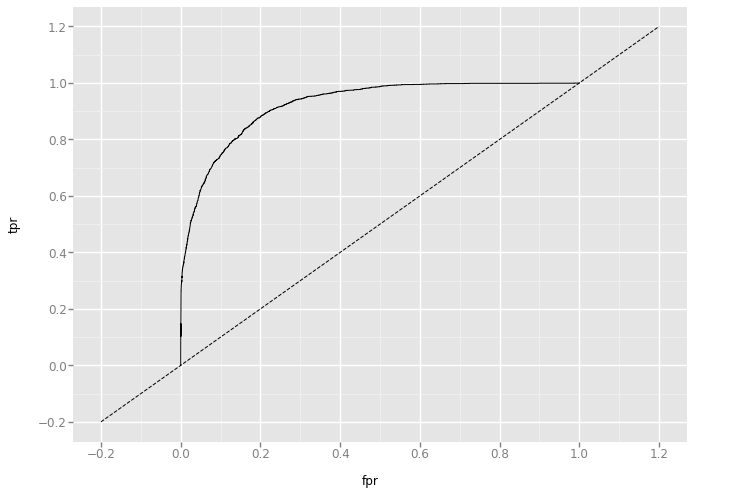

<ggplot: (29732328)>

In [82]:
probs =  GBC.best_estimator_.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
df = pd.DataFrame(dict(fpr = fpr, tpr = tpr))
ggplot(df, aes(x = 'fpr', y = 'tpr')) + geom_line() + geom_abline(linetype = 'dashed')

f) For your best performing model, plot out a ROC curve using your test data. Feel free to use sklearn, matplotlib or any other method in python. Describe what the x-axis & y-axis of the ROC curve tell us about a classifier.
The y-axis for the ROC curve is the true positive rate (True positives / Total population positives) while the x axis is the false positive rate. The equation for FPR is a bit trickier. FPR = 1 - specificity....  1 - (True negatives / Total population negatives). The decimal returned by the roc curve looks at the probability that the model will be able to determine class seperation. 